<a href="https://colab.research.google.com/github/sreeja2208/GivenAssignments/blob/main/Lab_13.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lab 13

In this lab, we will discuss dimensionality reduction techniques like feature selection, PCA, T-SNE and ISOMAP

![ater](https://storage.googleapis.com/lds-media/images/Dimensionality-Reduction-algorithms.width-1200.jpg)

## PCA

PCA has been called one of the most valuable results from applied linear algebra. PCA is used abundantly in all forms of analysis - from neuroscience to computer graphics - because it is a simple, non-parametric method of extracting relevant information from confusing data sets.

Principal Component Analysis (PCA) is a linear dimensionality reduction technique that can be utilized for extracting information from a high-dimensional space by projecting it into a lower-dimensional sub-space. It tries to preserve the essential parts that have more variation of the data and remove the non-essential parts with fewer variation.

PCA is generally used for 2 applications:

1) Visualization of high dimentional datasets

2) Reducing number of features, thereby speeding up ML algorithms.

We will be primarily focussing on the first application in this lab.

In [ ]:
from sklearn.datasets import load_breast_cancer

In this lab, we will be using the breast_caner dataset. The data has 569 samples with thirty features, and each sample has a label associated with it (benign or malignant).

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
breast_data = load_breast_cancer().data
print("Features:", breast_data.shape)  ### 569 rows and 30 columns expected

breast_labels = np.reshape(load_breast_cancer().target, (569,1))
print("Target:", breast_labels.shape) ### 569 rows and 1 target column expected

Features: (569, 30)
Target: (569, 1)


In [ ]:
## Creating a Pandas dataframe for the dataset with the last column as the target variable

final_breast_data = np.concatenate([breast_data,breast_labels],axis=1)
breast_dataset = pd.DataFrame(final_breast_data)

features = load_breast_cancer().feature_names
features_labels = np.append(features,'label')
breast_dataset.columns = features_labels
breast_dataset.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,label
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0.0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0.0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0.0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0.0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0.0


In [ ]:
# Dividing the values into the features and labels for convenience later on

X = breast_dataset.iloc[:,:30].values
y = breast_dataset.iloc[:,30].values

print(np.shape(X), np.shape(y))

(569, 30) (569,)


### Step By Step Computation Of PCA
The below steps need to be followed to perform dimensionality reduction using PCA:

1. Standardization of the data

2. Computing the covariance matrix

3. Calculating the eigenvectors and eigenvalues

4. Computing the Principal Components

5. Reducing the dimensions of the data set


### 1. Standardization of the data

---
It is a common practice to normalize your data before feeding it to any machine learning algorithm.

To apply normalization, you will import StandardScaler module from the sklearn library and then apply scaling by doing fit_transform on the feature data. While applying StandardScaler, each feature of your data should be normally distributed such that it will scale the distribution to a mean of zero and a standard deviation of one.


In [ ]:
from sklearn.preprocessing import StandardScaler
X_std = StandardScaler().fit_transform(X)

print(np.std(X_std))

1.0


### 2. Computing the covariance matrix

---

Recall that covariance is always measured between 2 dimensions. If we have a data set with more than 2 dimensions, there is more than one covariance measurement that can be calculated. For example, from a 3 dimensional data set (dimensions x,y,z) you could calculate cov(x,y), cov(y,z) and cov(x,z). In fact, for an n-dimensional data set, you can calculate N combinatorial 2 different covariances.

Here we have 30 different features, so we will have to compute 435 different covariances.

In [ ]:
mean_vec = np.mean(X_std, axis=0) ## Computing feature wise means

# Covariance matrix = i/(N-1) * X^T * X
# where X is the normalized feature matrix and N is the number of data points (rows)

cov_mat = 1/ (X_std.shape[0]-1) * (X_std - mean_vec).T.dot(X_std - mean_vec)

print('Covariance matrix first 5 rows and columns:\n', cov_mat[0:5, 0:5])

Covariance matrix first 5 rows and columns:
 [[ 1.00176056  0.32435193  0.99961207  0.98909547  0.17088151]
 [ 0.32435193  1.00176056  0.33011322  0.32165099 -0.02342969]
 [ 0.99961207  0.33011322  1.00176056  0.98824361  0.20764309]
 [ 0.98909547  0.32165099  0.98824361  1.00176056  0.17734005]
 [ 0.17088151 -0.02342969  0.20764309  0.17734005  1.00176056]]


A perhaps simpler way to do this is by using the numpy's covariance module "np.cov". However note that it takes as input the feature matrix with features in different rows, so in our application, we would be taking a transpose of the feature matrix before applying np.cov().

In [ ]:
cov_mat_numpy = np.cov(X_std.T)

print('Covariance matrix first 5 rows and columns:\n', cov_mat_numpy[0:5, 0:5])

Covariance matrix first 5 rows and columns:
 [[ 1.00176056  0.32435193  0.99961207  0.98909547  0.17088151]
 [ 0.32435193  1.00176056  0.33011322  0.32165099 -0.02342969]
 [ 0.99961207  0.33011322  1.00176056  0.98824361  0.20764309]
 [ 0.98909547  0.32165099  0.98824361  1.00176056  0.17734005]
 [ 0.17088151 -0.02342969  0.20764309  0.17734005  1.00176056]]


### 3. Calculating the eigenvectors and eigenvalues

---

Since the covariance matrix is square, we can calculate the eigenvectors and eigenvalues for this matrix. These are rather important, as they tell us useful information about our data. 

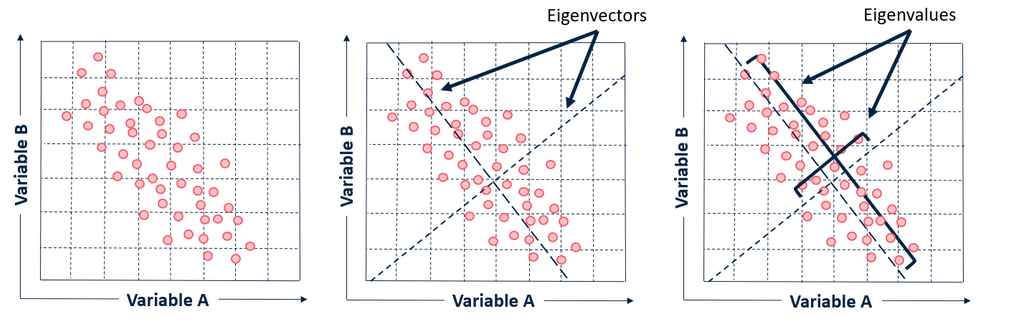

See how one of the eigenvectors goes through the middle of the points, like drawing a line of best fit? That eigenvector is showing us how these two data sets are related along that line. The second eigenvector gives us the other, less important, pattern in the data, that all the points follow the main line, but are off to the side of the main line by some amount.

So, by this process of taking the eigenvectors of the covariance matrix, we have
been able to extract lines that characterise the data.

In [ ]:
eig_vals, eig_vecs = np.linalg.eig(cov_mat)

### 4. Computing the Principal Components

---




In [ ]:
# Make a list of (eigenvalue, eigenvector) tuples
eig_pairs = []
for i in range(len(eig_vals)):
  eig_pairs.append( (np.abs(eig_vals[i]), eig_vecs[:,i]) )


# Sort the (eigenvalue, eigenvector) tuples from high to low
# key= lambda x: x[0] => use the eigenvalues (first component of the tuple) to sort the tuples
# reverse = Trye => Descending order
eig_pairs.sort(key=lambda x: x[0], reverse=True)


# Visually confirm that the list is correctly sorted by decreasing eigenvalues
print('Top 10 Eigenvalues in descending order:')
for i in eig_pairs[:10]:
    print(i[0])

Top 10 Eigenvalues in descending order:
13.304990794374568
5.701374603726145
2.8229101550062303
1.9841275177302011
1.6516332423301199
1.2094822398029705
0.6764088817009047
0.477456254689509
0.4176287821078165
0.35131087488173396


#### Plotting the variance explained and choosing the number of Principal components

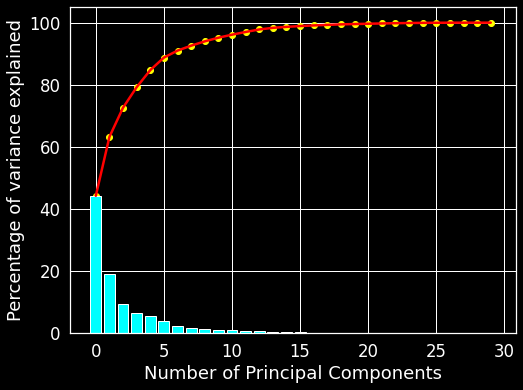

In [ ]:
total = np.sum(eig_vals)
eig_val = 100 * eig_vals/total
eig_val = sorted(eig_val, reverse=True)

with plt.style.context('dark_background'):
  plt.figure(figsize = (8, 6))
  plt.xlabel("Number of Principal Components")
  plt.ylabel("Percentage of variance explained")
  plt.bar(range(30), eig_val[:30], color = "aqua")
  plt.plot(range(30), np.cumsum(eig_val[:30]), color = "red")
  plt.scatter(range(30), np.cumsum(eig_val[:30]), color = "yellow")

So, the first principal component alone explains more than 40% variance in the dataset. Also note that considering all the 30 dimensions explains 100% of the variance in the dataset as expected.

Choosing a suitable number of components for further visualizations is generally based on the cumulative sum of PCs. The first 2 PCs explain nearly 65% variance, and the first 3 explain close to 75% variance.

Lets now try and reduce the dimensions of our dataset to the first 2 and 3 principal components

### 5. Reducing the dimensions of the data set

---



In [ ]:
matrix_w = np.hstack((eig_pairs[0][1].reshape(30,1), 
                      eig_pairs[1][1].reshape(30,1),
                      eig_pairs[2][1].reshape(30,1)))

Y = X_std.dot(matrix_w)

print(Y)

[[ 9.19283683  1.94858307 -1.12316616]
 [ 2.3878018  -3.76817174 -0.52929269]
 [ 5.73389628 -1.0751738  -0.55174759]
 ...
 [ 1.25617928 -1.90229671  0.56273053]
 [10.37479406  1.67201011 -1.87702933]
 [-5.4752433  -0.67063679  1.49044308]]


Now, that you have spent such a long time building this final matrix Y which has reduced each datapoint to 3 dimensions......

All of this can also be done in 2 lines by using sklearn's PCA module. 

In [ ]:
from sklearn.decomposition import PCA 

sklearn_pca = PCA(n_components=3)
Y_sklearn = sklearn_pca.fit_transform(X_std)

print(Y_sklearn)

[[ 9.19283683  1.94858319 -1.12317276]
 [ 2.3878018  -3.76817167 -0.52929684]
 [ 5.73389628 -1.07517378 -0.55174692]
 ...
 [ 1.25617928 -1.90229676  0.56273267]
 [10.37479406  1.67201009 -1.87702829]
 [-5.4752433  -0.67063653  1.49043117]]


## Let's visualize our dataset in 2 and 3 dimensions now

---



In [ ]:
final_df = pd.DataFrame(columns=["PC1", "PC2", "PC3", "Label"])

for i in range(len(Y)):
    
    dicti = dict()
    
    dicti["PC1"] = Y[i, 0]
    dicti["PC2"] = Y[i, 1]
    dicti["PC3"] = Y[i, 2]
    if (int(breast_labels[i][0]) == 0):
      dicti["Label"] = "Benign"
    else:
      dicti["Label"] = "Malignant"
    
    final_df = final_df.append(dicti, ignore_index = True)

final_df.head()

,PC1,PC2,PC3,Label
0,9.192837,1.948583,-1.123166,Benign
1,2.387802,-3.768172,-0.529293,Benign
2,5.733896,-1.075174,-0.551748,Benign
3,7.122953,10.275589,-3.232790,Benign
4,3.935302,-1.948072,1.389767,Benign


In [ ]:
import plotly.graph_objects as go
import plotly.express as px

In [ ]:
for_x = final_df.PC1.tolist()
for_y = final_df.PC2.tolist()
for_label = final_df.Label.tolist()
for_hover = final_df.Label.tolist()

fig = px.scatter(x=for_x, y=for_y, color=for_label,
                 title="Principal Component Axis",
                 color_discrete_map={"Benign": "aqua", "Malignant": "yellow"})

fig.update_layout(
    xaxis=dict(title = 'PC1', showgrid=True, ticks='inside', zeroline=True, mirror=True, showline=True, linecolor='white'),
    yaxis=dict(title = 'PC2', showgrid=True, ticks='inside', zeroline=True, mirror=True, showline=True, linecolor='white'),
    plot_bgcolor='#555555',
    font=dict(
        family="Times New Roman",
        size=16,
        color="Black"))
fig.update_traces(marker=dict(size=8,))

fig.show(renderer = "colab")

### Question: 
Referring to the plot above, can you reason why PCA can be a good candidate before training models for Machine learning?

#### Answer: 
You can see that the first 2 principal components were able to differentiate the benign and malignant tumours in our breast cancer dataset. This motivates the use of the second application of PCA, which was to reduce the number of features in the dataset so that the machine learning algorithm can be trained without overfitting.



Let us now try and visualize this in the first 3 Principal Components space.

In [ ]:
fig = px.scatter_3d(final_df, x='PC1', y='PC2', z='PC3', color='Label', title="Principal Component Axis")
fig.update_traces(marker=dict(size=6,))

fig.show(renderer = "colab")

Feel free to explore this interactive plot by PLOTLY, which is also another great tool for visualizations. You can zoom, pan, rotate, turn and download this plot.

### Some interesting references:

1. https://builtin.com/data-science/step-step-explanation-principal-component-analysis

2. http://www.cs.otago.ac.nz/cosc453/student_tutorials/principal_components.pdf

3. https://www.cs.cmu.edu/~elaw/papers/pca.pdf

4. https://towardsdatascience.com/pca-using-python-scikit-learn-e653f8989e60

## ISOMAP

We will be now focussing on non-linear dimensionality reduction methods or Manifold learning methods.

So a manifold is any space that is locally Euclidean. For example, the Earth is round but it looks flat to us. The Earth is a manifold: locally it is flat, but globally we know it is a sphere. Then, manifold learning performs dimensionality reduction by representing data as low-dimensional manifolds embedded in a higher-dimensional space.

We often suspect that high-dim may actually lie on or near a low-dim manifold (often much lower!) and it would be useful if we could reparametrize the data in terms of this manifold, yielding a low-dim embedding BUT - we typically don’t know the form of this manifold.

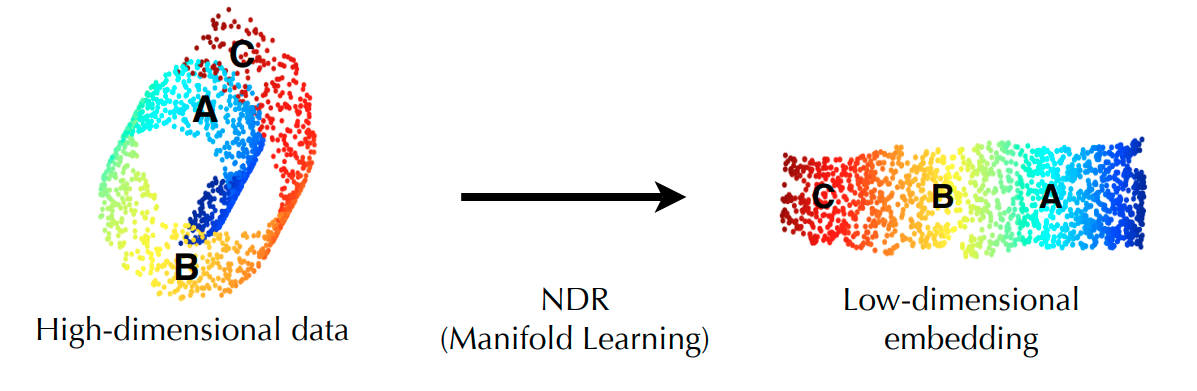

## ISOMAP

---

Isomap stands for **ISOmetric feature MAPping**. Isomap is a non-linear dimensionality reduction method based on the spectral theory which tries to preserve the geodesic distances in the lower dimension. 

#### But what are Geodesic Distances?



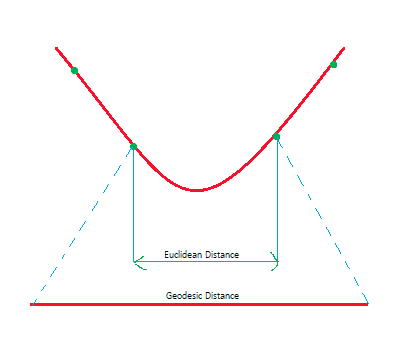

The next question should be: 

*How can we compute geodesics without knowing the manifold?* ....... 
ANSWER: So we build an adjacency graph and approximate geodesic distances by shortest-paths through the graph.


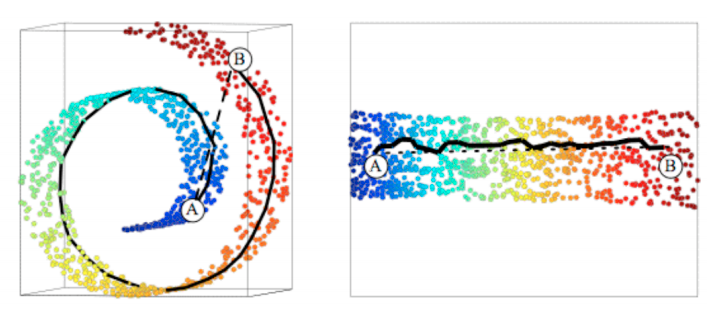

#### 3 steps for ISOMAP:

1. Build the adjacency graph over the points using a Neighbourhood selection method (let's say k nearest neighbours)
2. Compute approximate geodesics: Weight graph edges by inter-point distances and then apply Dijkstra’s all-pairs shortest-paths algorithm.
3. Take the top d eigenvectors of the Gram matrix.


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn import datasets

First let us simulate a dataset with the points lying on a manifold which we would want our Isomap to be able to capture. 

We will be using the make_s_curve() function in the sklearn.datasets module to make the manifold using 1000 data points

In [ ]:
n_points = 1000
X, color = datasets.make_s_curve(n_points, random_state=0)

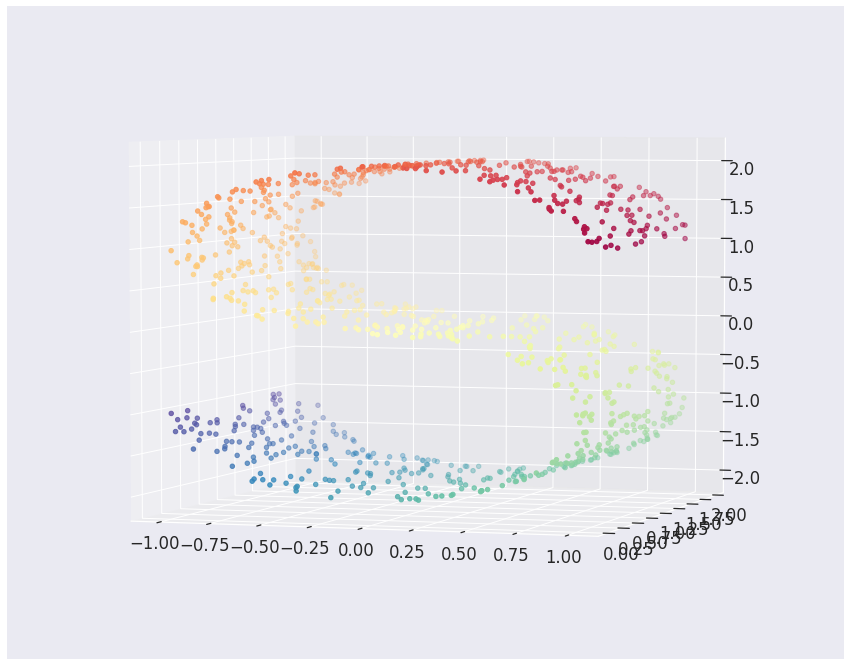

In [ ]:
fig = plt.figure(figsize=(15, 12))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=color, cmap=plt.cm.Spectral)
ax.view_init(4, -72)

Note that all the points appear to be a lying on a curved 2d plane in this 3d dataset. Now we will be coding the Isomap algorithm to perform this manifold learning.


---

### Step 1a: First lets compute the distance matrix (pairwise Euclidean distances) from the data


In [ ]:
def dist(a, b):

  '''Computes Euclidean distance between 2 points'''

  return np.sqrt(sum((a - b)**2))

distances = np.array([[dist(p1, p2) for p2 in X] for p1 in X])

# For N points in the dataset, this matrix should be of the dimension NxN.
# Our dataset had 1000 points, so we expect the dimensions of this matrix to be 1000x1000
print(distances.shape)

(1000, 1000)


### Step 1b: Let us keep only k nearest neighbors for each point in the distance matrix.

In [ ]:
# Lets keep only the 10 nearest neighbors, others set to 0 (= unreachable)

n_neighbors = 10
neighbors = np.zeros(distances.shape)

sort_distances = np.argsort(distances, axis=1)[:, 1:n_neighbors+1]
for k,i in enumerate(sort_distances):
    neighbors[k,i] = distances[k,i]



---

### Step 2: Weight graph edges by inter-point distances and then apply Dijkstra’s all-pairs shortest-paths algorithm.

We will be using the graph_shortest_path() function in the sklearn.utils.graph module. 

The function takes an array of positive distances as the parameter. It then performs a shortest-path graph search on the graph and returns a matrix G (shape = N,N), where, G(i,j) gives the shortest distance from point i to point j along the graph.


In [ ]:
from sklearn.utils.graph import graph_shortest_path

graph = graph_shortest_path(neighbors, directed=False)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function graph_shortest_path is deprecated; `graph_shortest_path` is deprecated in 1.0 (renaming of 0.25) and will be removed in 1.2. Use `scipy.sparse.csgraph.shortest_path` instead.





---
### Step 3: Take the top d eigenvectors of the Gram matrix.


So let us first compute the gram matrix. If we have a matrix **graph**, then its Gram matrix is **graph**.T * **graph**





In [ ]:
gram = (graph ** 2)

We will now be computing the eigenvectors for this matrix, so lets first center the data points.

In [ ]:
n_samples = gram.shape[0]

# Mean for each row/column
meanrows = np.sum(gram, axis=0) / n_samples
meancols = (np.sum(gram, axis=1)/n_samples)[:, np.newaxis]

# NUMPY TRICKS: np.newaxis is used to increase the dimension of the existing array by one more dimension. So a (1000,) matrix becomes a (1000,1) matrix.

# Mean across all rows (entire matrix)
meanall = meanrows.sum() / n_samples

gram -= meanrows
gram -= meancols
gram += meanall

Computing eigenvectors

In [ ]:
# Using the np.linalg.eig() to compute eigenvectors and eigenvalues for the matrix
eig_val_cov, eig_vec_cov = np.linalg.eig(gram)

# We will be sorting the eigenvalues and to preserve the corresponding eigenvectors, let us make a list of (eigenvalue, eigenvector) tuples
eig_pairs = [(np.abs(eig_val_cov[i]), eig_vec_cov[:, i]) for i in range(len(eig_val_cov))]

# We want to reduce the dimensionality to **n_components** dimensions, therefore we will be first taking the top **n_components** eigenvectors (sorted in descending by eigenvalues)
eig_pairs.sort(key=lambda x: x[0], reverse=True)
eig_pairs = np.array(eig_pairs)

# Transforming the matrix (dimensionality reduction)
n_components = 2

reduced_matrix = np.zeros((n_components, gram.shape[1]))
for i in range(n_components):
  reduced_matrix[i,:] = eig_pairs[i,1]
reduced_matrix = reduced_matrix.T

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: VisibleDeprecationWarning:

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.





---

## Plotting the resultant reduced_matrix


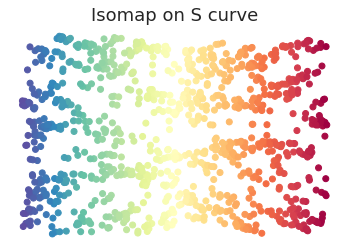

In [ ]:
ax = fig.add_subplot(111)
plt.scatter(reduced_matrix[:, 0], reduced_matrix[:, 1], c=color, cmap=plt.cm.Spectral)
plt.title("Isomap on S curve")
plt.axis('off')
plt.show()

##### As you can see the Isomap was able to capture the underlying 2d manifold in the S curve dataset.

Now of course there is an easier way to do this, using a predefined library Isomap by sklearn in the manifold module. It just requires you to enter the number of neighbours to be considered and the number of components the graph is to be reduced to.


In [ ]:
from sklearn.manifold import Isomap

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: MatplotlibDeprecationWarning:

Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.



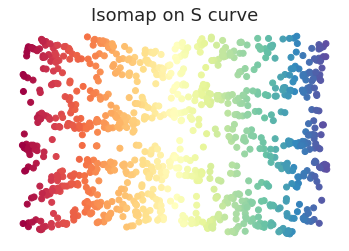

In [ ]:
Y = Isomap(n_neighbors=10, n_components=2).fit_transform(X)

ax = fig.add_subplot(111)
plt.scatter(Y[:, 0], Y[:, 1], c=color, cmap=plt.cm.Spectral)
plt.title("Isomap on S curve")
plt.axis('off')
plt.show()



---

### Now let us see if Isomap can learn the manifold representation in some more complex datasets

In [ ]:
from sklearn.datasets import fetch_lfw_people
faces = fetch_lfw_people(min_faces_per_person=200)
faces.data.shape

(766, 2914)

We loaded 766 images, each having 2914 pixels. Let us visualize our dataset before reducing the dimension

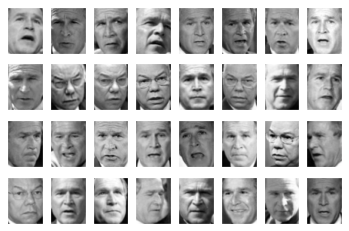

In [ ]:
fig, ax = plt.subplots(4, 8, subplot_kw=dict(xticks=[], yticks=[]))
for i, axi in enumerate(ax.flat):
    axi.imshow(faces.images[i], cmap='gray')

Our data is 2914 dimensional and our goal is to learn a low dimensional manifold from it. We first apply PCA (which we learn in Lab 2) and see if PCA is able to reduce it to lower dimensions while preserving much of the variance.

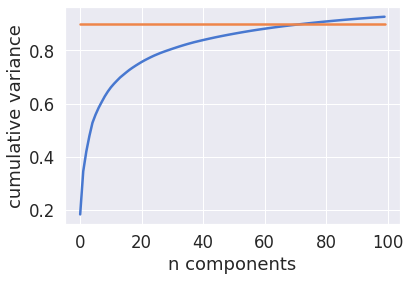

In [ ]:
from sklearn.decomposition import PCA as RandomizedPCA
model = RandomizedPCA(100).fit(faces.data)
plt.plot(np.cumsum(model.explained_variance_ratio_))
plt.xlabel('n components')
plt.ylabel('cumulative variance')
plt.plot(range(100), 0.9*np.ones(100))

So we can clearly observe that PCA requires more than 70 dimensions to be able to explain 90% of the variance, implying that PCA is failing to learn the underlying manifold effectively. 

Let us now try to apply Isomap to this dataset and see if it is able to learn the representation effectively.

In [ ]:
model = Isomap(n_components=2, n_neighbors = 5)
proj = model.fit_transform(faces.data)
proj.shape

(766, 2)

We have reduced the dataset from 2914 dimensions to just 2 dimensions. Let us now visualize the result to be able to better understand the latent representation learnt by Isomap

In [ ]:
from matplotlib import offsetbox

def plot_components(data, model, images=None, ax=None, thumb_frac=0.05, cmap='gray'):

    ax = ax or plt.gca()
    proj = model.fit_transform(data)
    ax.plot(proj[:, 0], proj[:, 1], '.k')
    
    if images is not None:
        min_dist_2 = (thumb_frac * max(proj.max(0) - proj.min(0))) ** 2
        shown_images = np.array([2 * proj.max(0)])
        for i in range(data.shape[0]):
            dist = np.sum((proj[i] - shown_images) ** 2, 1)
            if np.min(dist) < min_dist_2:
                # don't show points that are too close
                continue
            shown_images = np.vstack([shown_images, proj[i]])
            imagebox = offsetbox.AnnotationBbox(
                offsetbox.OffsetImage(images[i], cmap=cmap),
                                      proj[i])
            ax.add_artist(imagebox)

Text(0, 0.5, 'Image Darkness')

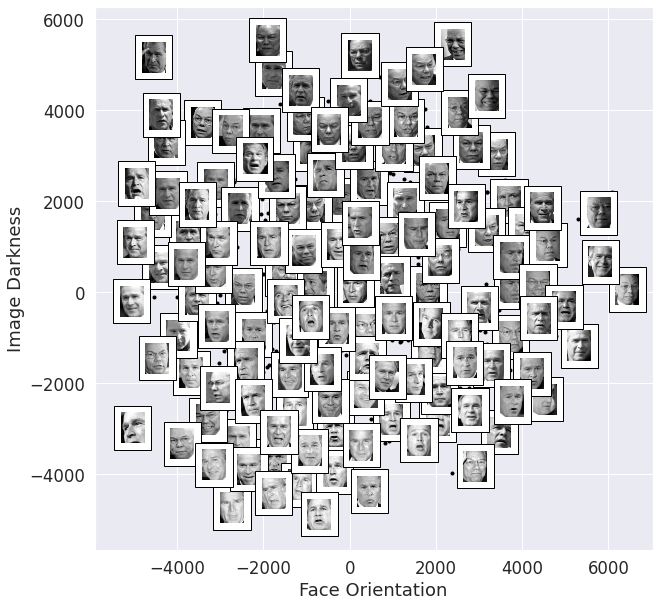

In [ ]:
fig, ax = plt.subplots(figsize=(10, 10))
plot_components(faces.data,
                model=Isomap(n_components=2, n_neighbors = 5),
                images=faces.images[:, ::2, ::2])
plt.xlabel("Face Orientation")
plt.ylabel("Image Darkness")

We get a very interesting result here. You can see that the Isomap was able to capture very interesting insights regarding the dataset. 

If you observe along the x-axis, the images are positioned such that the orientation of the faces changes from left to right. Similarly, the darkness of the image increases in the positive direction of the y-axis. 

This clearly indicates that Isomap was able to capture the underlying manifold very precisely in just 2 dimensions.

**You are motivated to play around with the number of neighbors and check if the following holds true across neighbourhoods!**



---


## Some questions you should think about!!

How do you think would the number of neighbors effect the Isomap algorithm? What happens when the number of neighbors considered is very large? What happens when it is very low?

When is the ISOMAP algorithm superior to PCA?


---

## Conclusion: 
In practice manifold learning techniques tend to be finicky enough that they are rarely used for anything more than simple qualitative visualization of high-dimensional data.

The following are some of the particular challenges of manifold learning, which all contrast poorly with PCA:

1) In manifold learning, there is no good framework for handling missing data. In contrast, there are straightforward iterative approaches for missing data in PCA.

2) In manifold learning, the presence of noise in the data can "short-circuit" the manifold and drastically change the embedding. In contrast, PCA naturally filters noise from the most important components.

3) The manifold embedding result is generally highly dependent on the number of neighbors chosen, and there is generally no solid quantitative way to choose an optimal number of neighbors. In contrast, PCA does not involve such a choice.

4) In manifold learning, the globally optimal number of output dimensions is difficult to determine. In contrast, PCA lets you find the output dimension based on the explained variance.

5) In manifold learning, the meaning of the embedded dimensions is not always clear. In PCA, the principal components have a very clear meaning.

6) In manifold learning the computational expense of manifold methods scales as O[N^2] or O[N^3]. For PCA, there exist randomized approaches that are generally much faster (though see the megaman package for some more scalable implementations of manifold learning).

Therefore with all that on the table, the only clear advantage of manifold learning methods over PCA is their ability to preserve nonlinear relationships in the data; for that reason I tend to explore data with manifold methods only after first exploring them with PCA.




---


### Some interesting references:

1) https://axon.cs.byu.edu/Dan/678/miscellaneous/Manifold.example.pdf

2) http://vision.cse.psu.edu/seminars/talks/PRML/David_NDR_lecture.pdf


---



## T-SNE

Now we will look at dimensionality reduction techniques for large dtasets.


t-SNE stands for t-Distributed Stochastic Neighbor Embedding. It is an unsupervised, non-linear technique primarily used for data exploration and visualizing high-dimensional data. It was developed by Laurens van der Maatens and Geoffrey Hinton in 2008 (Link to the paper: https://www.jmlr.org/papers/volume9/vandermaaten08a/vandermaaten08a.pdf)

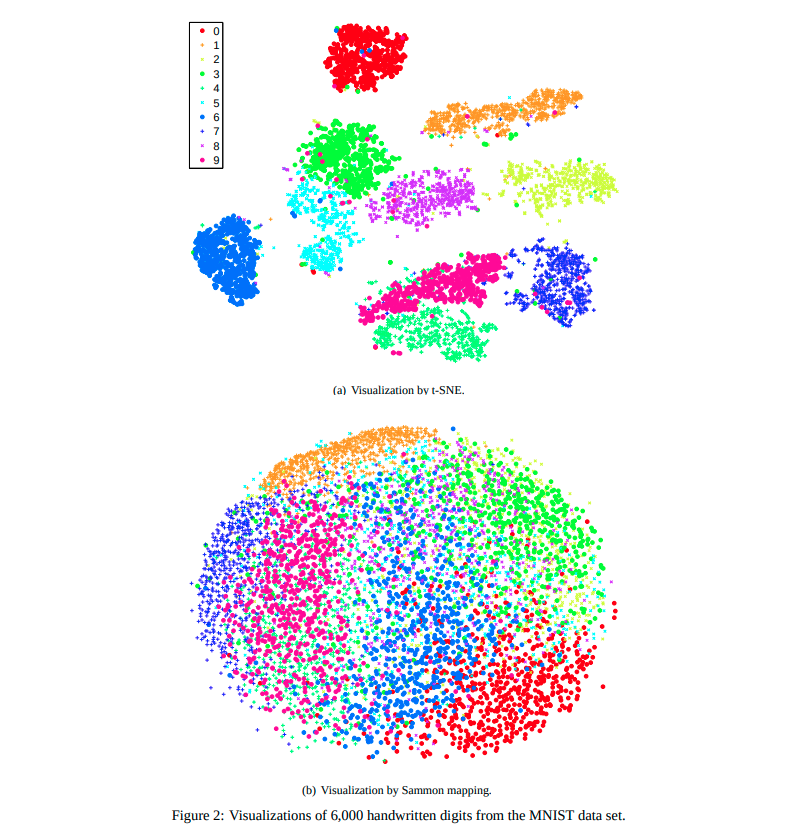

t-SNE has a tuneable parameter, **perplexity** which balances attention between the local and global aspects of your data. It is a guess about the number of close neighbors each point has. The perplexity value has a complex effect on the resulting pictures. The original paper says, “The performance of t-SNE is fairly robust to changes in the perplexity, and typical values are between 5 and 50.” But the story is more nuanced than that. Getting the most from t-SNE may mean analyzing multiple plots with different perplexities.

Also the t-SNE algorithm doesn’t always produce similar output on successive runs as there are additional hyperparameters related to the optimization process.

### HOW DOES T-SNE WORK??

The t-SNE algorithm calculates a similarity measure between pairs of instances in the high dimensional space and in the low dimensional space. It then tries to optimize these two similarity measures using a cost function. Let’s break that down into 3 basic steps.

1. Measure similarities between points in the high dimensional space. Think of a bunch of data points scattered on a 2D space. For each data point (xi) we’ll center a Gaussian distribution over that point. Then we measure the density of all points (xj) under that Gaussian distribution. Then renormalize for all points. This gives us a set of probabilities (Pij) for all points. Those probabilities are proportional to the similarities. All that means is, if data points x1 and x2 have equal values under this gaussian circle then their proportions and similarities are equal and hence you have local similarities in the structure of this high-dimensional space. The Gaussian distribution or circle can be manipulated using what’s called perplexity, which influences the variance of the distribution (circle size) and essentially the number of nearest neighbors.

2. This step is similar to step 1, but instead of using a Gaussian distribution we use a Student t-distribution with one degree of freedom, which is also known as the Cauchy distribution (See fig below). This gives us a second set of probabilities (Qij) in the low dimensional space. As you can see the Student t-distribution has heavier tails than the normal distribution. The heavy tails allow for better modeling of far apart distances.

3. The last step is that we want these set of probabilities from the low-dimensional space (Qij) to reflect those of the high dimensional space (Pij) as best as possible. We want the two map structures to be similar. We measure the difference between the probability distributions of the two-dimensional spaces using Kullback-Liebler divergence (KL). Finally, we use gradient descent to minimize our KL cost function.

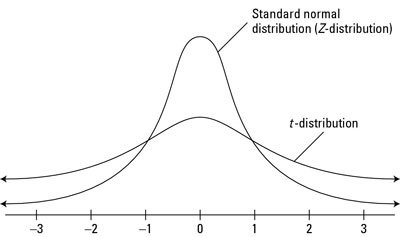

Scikit-learn has an implementation of t-SNE available which provides a wide variety of tuning parameters for t-SNE, and the most notable ones are:

1. n_components (default: 2): Dimension of the embedded space.
2. perplexity (default: 30): The perplexity is related to the number of nearest neighbors that are used in other manifold learning algorithms. Consider selecting a value between 5 and 50.
3. n_iter (default: 1000): Maximum number of iterations for the optimization. Should be at least 250.
4. method (default: ‘barnes_hut’): Barnes-Hut approximation runs in O(NlogN) time. method=’exact’ will run on the slower, but exact, algorithm in O(N^2) time.

In [ ]:
# numpy.
import numpy as np
from numpy import linalg
from numpy.linalg import norm
from scipy.spatial.distance import squareform, pdist

# sklearn.
import sklearn
from sklearn.manifold import TSNE
from sklearn.datasets import load_digits
from sklearn.preprocessing import scale

# Random state.
RS = 20150101

# matplotlib.
import matplotlib.pyplot as plt
import matplotlib.patheffects as PathEffects
import matplotlib
%matplotlib inline

# seaborn.
import seaborn as sns
sns.set_style('darkgrid')
sns.set_palette('muted')
sns.set_context("notebook", font_scale=1.5,
                rc={"lines.linewidth": 2.5})

1797 images each of size 8 x 8 loaded using load_digits()

In [ ]:
digits = load_digits()
digits.data.shape

(1797, 64)

Printing some images from the dataset

---



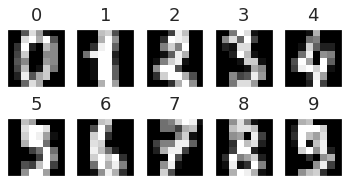

In [ ]:
nrows, ncols = 2, 5
plt.figure(figsize=(6,3))
plt.gray()
for i in range(ncols * nrows):
    ax = plt.subplot(nrows, ncols, i + 1)
    ax.matshow(digits.images[i,...])
    plt.xticks([]); plt.yticks([])
    plt.title(digits.target[i])

In [ ]:
# We first reorder the data points according to the handwritten numbers.
X = np.vstack([digits.data[digits.target==i]
               for i in range(10)])
y = np.hstack([digits.target[digits.target==i]
               for i in range(10)])

## Now using TSNE to fit the dataset with the default values.


1. n_components : 2
2. perplexity : 30
3. n_iter : 1000
4. method : ‘barnes_hut’


---



In [ ]:
digits_proj = TSNE(random_state=RS).fit_transform(X)

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning:

The default initialization in TSNE will change from 'random' to 'pca' in 1.2.

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning:

The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.



#### Visualizing the data in the projected space

---



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: DeprecationWarning:

`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations



(<Figure size 576x576 with 1 Axes>,
 <matplotlib.collections.PathCollection at 0x7f3e0be2f0d0>)

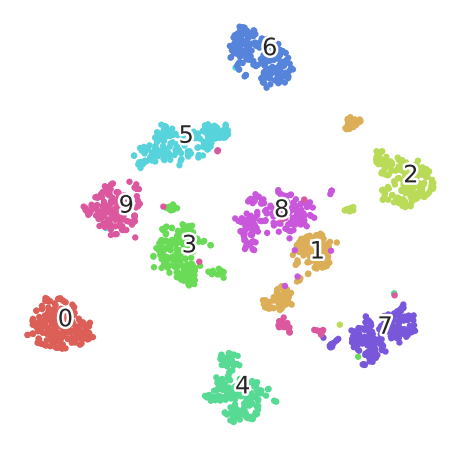

In [ ]:
def scatter(x, colors):
    # We choose a color palette with seaborn.
    palette = np.array(sns.color_palette("hls", 10))

    # We create a scatter plot.
    f = plt.figure(figsize=(8, 8))
    ax = plt.subplot(aspect='equal')
    sc = ax.scatter(x[:,0], x[:,1], lw=0, s=40,
                    c=palette[colors.astype(np.int)])
    plt.xlim(-25, 25)
    plt.ylim(-25, 25)
    ax.axis('off')
    ax.axis('tight')

    # We add the labels for each digit.
    txts = []
    for i in range(10):
        # Position of each label.
        xtext, ytext = np.median(x[colors == i, :], axis=0)
        txt = ax.text(xtext, ytext, str(i), fontsize=24)
        txt.set_path_effects([
            PathEffects.Stroke(linewidth=5, foreground="w"),
            PathEffects.Normal()])
        txts.append(txt)

    return f, ax, sc

scatter(digits_proj, y)

# Tweaking some of the hyperparameters to better understand their role

---

### Changing the PERPLEXITY values


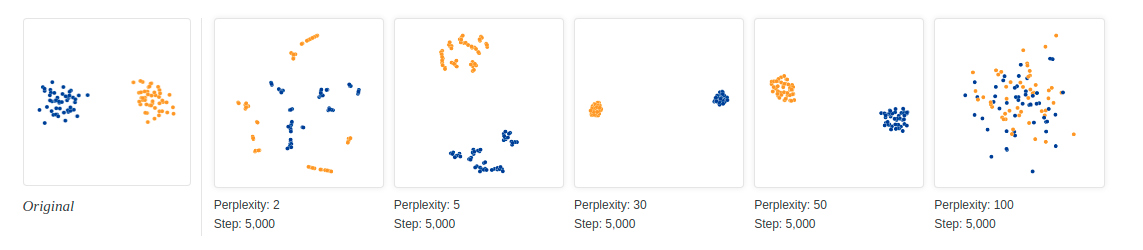

With perplexity values in the range (5 - 50) suggested by van der Maaten & Hinton, the diagrams do show these clusters, although with very different shapes. Outside that range, things get a little weird. With perplexity 2, local variations dominate. The image for perplexity 100, with merged clusters, illustrates a pitfall: for the algorithm to operate properly, the perplexity really should be smaller than the number of points. Implementations can give unexpected behavior otherwise.



---


1. n_components : 2
2. perplexity : **5** 
3. n_iter : 1000
4. method : ‘barnes_hut’


---

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning:

The default initialization in TSNE will change from 'random' to 'pca' in 1.2.

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning:

The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: DeprecationWarning:

`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations



(<Figure size 576x576 with 1 Axes>,
 <matplotlib.collections.PathCollection at 0x7f3e0be2f110>)

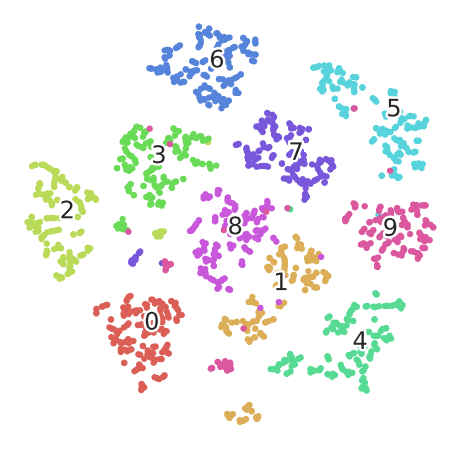

In [ ]:
digits_proj = TSNE(random_state=RS, perplexity = 5).fit_transform(X)

scatter(digits_proj, y)

We can see that there are local clusters within the same number group as well. This is happening as the perplexity being at 5, allows the local neighbourhood to dominate. Let us now see what happens if we increase the perplexity to 100, thereby increasing global impact.





---


1. n_components : 2
2. perplexity : **100** 
3. n_iter : 1000
4. method : ‘barnes_hut’


---

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning:

The default initialization in TSNE will change from 'random' to 'pca' in 1.2.

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning:

The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: DeprecationWarning:

`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations



(<Figure size 576x576 with 1 Axes>,
 <matplotlib.collections.PathCollection at 0x7f3e0bada1d0>)

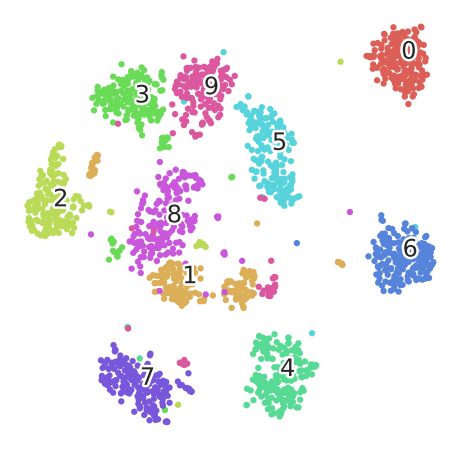

In [ ]:
digits_proj = TSNE(random_state=RS, perplexity = 100).fit_transform(X)

scatter(digits_proj, y)

The general structure of the plot remained similar to the one with perplexity = 30 (default), but on careful observation you can observe many data points not being part of the group they are supposed to be in. This is because of the large number of points considered for the neighbourhood (as perplexity value = 100 is higher), thereby allowing 2 data points from different groups to end up closer.



---

### Changing the NUMBER OF ITERATIONS

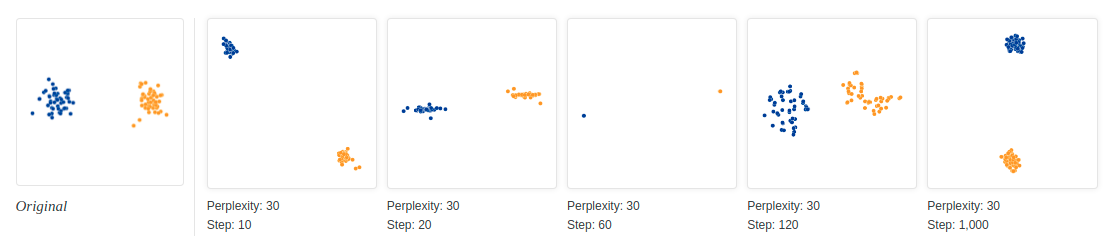

The images above show five different runs at perplexity 30. The first four were stopped before stability. After 10, 20, 60, and 120 steps you can see layouts with seeming 1-dimensional and even pointlike images of the clusters. If you see a t-SNE plot with strange “pinched” shapes, chances are the process was stopped too early. Unfortunately, there’s no fixed number of steps that yields a stable result. Different data sets can require different numbers of iterations to converge.

The most important thing is to iterate until reaching a stable configuration.





---


1. n_components : 2
2. perplexity : 30 
3. n_iter : **250**
4. method : ‘barnes_hut’


---

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning:

The default initialization in TSNE will change from 'random' to 'pca' in 1.2.

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning:

The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: DeprecationWarning:

`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations



(<Figure size 576x576 with 1 Axes>,
 <matplotlib.collections.PathCollection at 0x7f3e0b9c2a90>)

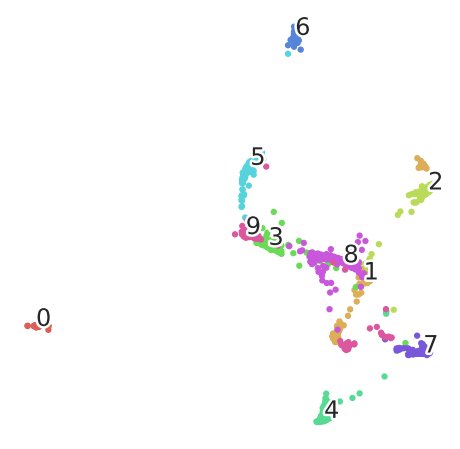

In [ ]:
digits_proj = TSNE(random_state=RS, n_iter = 250).fit_transform(X)

scatter(digits_proj, y)

As can be seen from the figure above, stopping the optimization earlier (in 250 iterations) resulted in a suboptimal clustering of the groups. 

Let us now see how the results are affected if t-SNE is run for larger number of iterations


---


1. n_components : 2
2. perplexity : 30 
3. n_iter : **5000**
4. method : ‘barnes_hut’


---

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning:

The default initialization in TSNE will change from 'random' to 'pca' in 1.2.

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning:

The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: DeprecationWarning:

`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations



(<Figure size 576x576 with 1 Axes>,
 <matplotlib.collections.PathCollection at 0x7f3e0be52a50>)

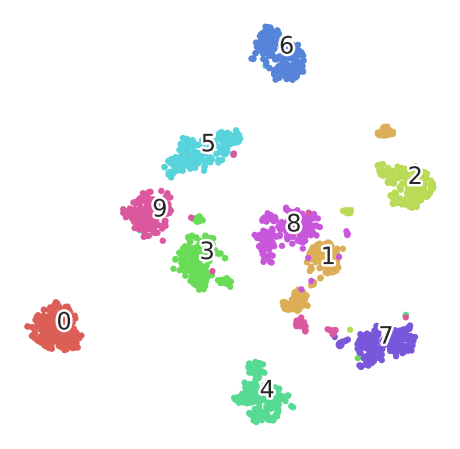

In [ ]:
digits_proj = TSNE(random_state=RS, n_iter = 5000).fit_transform(X)

scatter(digits_proj, y)

Running for larger number of iterations more or less resulted in the same plot as the optimization had nearly converged till the default 1000 iterations. However the density of the clusters has increased.

---

### Changing the method to EXACT

The barnes-hut method takes O(NlogN) time, whereas the exact method takes O(N^2) time. Notice the increase in the execution time while running the cell below.


---

1. n_components : 2
2. perplexity : 30 
3. n_iter : 1000
4. method : **‘exact’**


---

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning:

The default initialization in TSNE will change from 'random' to 'pca' in 1.2.

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning:

The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: DeprecationWarning:

`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations



(<Figure size 576x576 with 1 Axes>,
 <matplotlib.collections.PathCollection at 0x7f3e0be52590>)

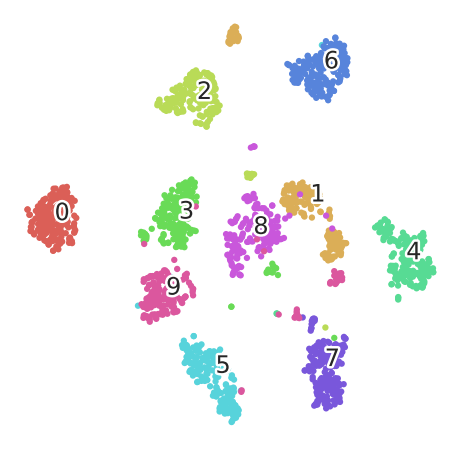

In [ ]:
digits_proj = TSNE(random_state=RS, method = 'exact').fit_transform(X)

scatter(digits_proj, y)

## EXERCISE

---



Try out different perplexity and iteration values to better appreciate the concepts taught.

You can modify the code in the cell below to check the resultant plots.

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning:

The default initialization in TSNE will change from 'random' to 'pca' in 1.2.

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning:

The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: DeprecationWarning:

`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations



(<Figure size 576x576 with 1 Axes>,
 <matplotlib.collections.PathCollection at 0x7f3e0bcbab90>)

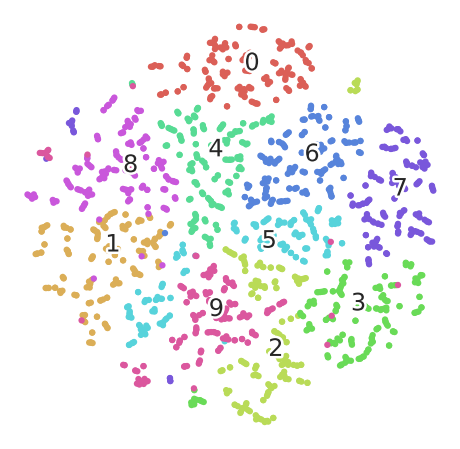

In [ ]:
###### MODIFY THE VALUES FOR THE HYPERPARAMETERS BELOW ########

perplexity_value = 2
number_iterations = 1000
method = 'barnes_hut'

################################################################

digits_proj = TSNE(random_state=RS, n_iter = number_iterations, perplexity = perplexity_value, method = method).fit_transform(X)
scatter(digits_proj, y)



---

## QUESTION: 

Now that you understand t-SNE a bit better, can you point out some differences between PCA and t-SNE. What are the advantages/disadvantages of one over the other?


##### Pointers:

1. Which of the two algorithms is linear and which one is non-linear?
2. How does the non-linearity in one of these two algorithms help in capturing certain data sets?
3. PCA is known to keep points which were further apart in the higher dimension, far apart in the lower dimension as well. Does t-SNE do the same? Or does it try to preserve local neighbourhood?
4. Can you comment on which one of the two is computationally more expensive?




---
 ## Some interesting references:

 1. https://blog.paperspace.com/dimension-reduction-with-t-sne/
 2. https://towardsdatascience.com/an-introduction-to-t-sne-with-python-example-5a3a293108d1
 3. https://distill.pub/2016/misread-tsne/



---


